# Exploratory Data Analysis (EDA) of SMS Spam Collection Dataset

This notebook performs exploratory data analysis (EDA) on the SMS Spam Collection Dataset to understand its structure, identify patterns, and discover potential issues. The insights gained here will inform the preprocessing steps and model building in subsequent notebooks.

## Table of Contents
1. [Introduction](#exploratory-data-analysis-eda-of-sms-spam-collection-dataset)
2. [Loading the Data](#loading-the-data)
3. [Data Cleaning](#data-cleaning)
4. [Data Overview](#data-overview)
5. [Class Distribution](#class-distribution)
6. [Text Analysis](#text-analysis)
7. [Exporting the Data](#exporting-the-data)
8. [Summary and Insights](#summary-and-insights)

## Loading the Data

Load the SMS Spam Collection Dataset and take an initial look at its structure.

In [1]:
import pandas as pd

# load the dataset
data_path = 'data/raw/spam.csv'
df = pd.read_csv(data_path, encoding='latin-1')

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

Clean the dataset by removing unnecessary columns, renaming columns for clarity, checking for and handling any missing values, and converting the labels to +1 for spam and -1 for ham (not spam).

In [2]:
# Rename columns for clarity
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Convert labels to +1 for spam and -1 for ham
df['label'] = df['label'].map({'spam': 1.0, 'ham': -1.0})

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the cleaned dataset
df.head()

label      0
message    0
dtype: int64


,label,message
0,-1.0,"Go until jurong point, crazy.. Available only ..."
1,-1.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,-1.0,U dun say so early hor... U c already then say...
4,-1.0,"Nah I don't think he goes to usf, he lives aro..."


## Data Overview

Here, we will examine the structure of the dataset, including data types, missing values, and basic statistics.

In [3]:
# Display data types and missing values
df.info()

# Basic statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    5572 non-null   float64
 1   message  5572 non-null   object 
dtypes: float64(1), object(1)
memory usage: 87.2+ KB


,label,message
count,5572.000000,5572
unique,NaN,5169
top,NaN,"Sorry, I'll call later"
freq,NaN,30
mean,-0.731874,NaN
std,0.681502,NaN
min,-1.000000,NaN
25%,-1.000000,NaN
50%,-1.000000,NaN
75%,-1.000000,NaN


## Class Distribution

We will analyze the distribution of the target variable to understand the class imbalance, if any. This will help us understand the dataset better and inform our preprocessing and modeling steps.

label
-1.0    4825
 1.0     747
Name: count, dtype: int64


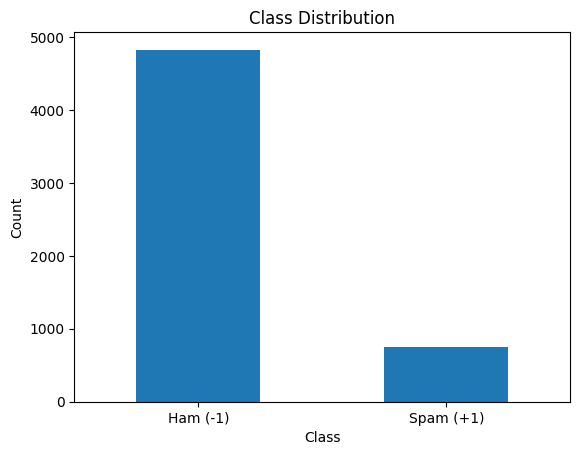

In [4]:
# Calculate class distribution
class_counts = df['label'].value_counts()
print(class_counts)

# Plot the class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', title='Class Distribution', xlabel='Class', ylabel='Count')
plt.xticks(ticks=[0, 1], labels=['Ham (-1)', 'Spam (+1)'], rotation=0)
plt.show()

The plot above shows the distribution of spam and ham messages in the dataset. There are 4825 ham messages (-1) and 747 spam messages (+1), indicating a significant class imbalance. A balanced dataset would have an approximately equal number of spam and ham messages. An imbalanced dataset can lead to biased models that perform well on the majority class (ham) but poorly on the minority class (spam). This imbalance will need to be handled during the preprocessing phase.

## Text Analysis

In this section, we will delve into the text data to gain insights into its characteristics. This includes analyzing message lengths, most common words, and any other interesting patterns.

### Message Length

Average message length for spam messages: 138.87 characters
Average message length for ham messages: 71.02 characters


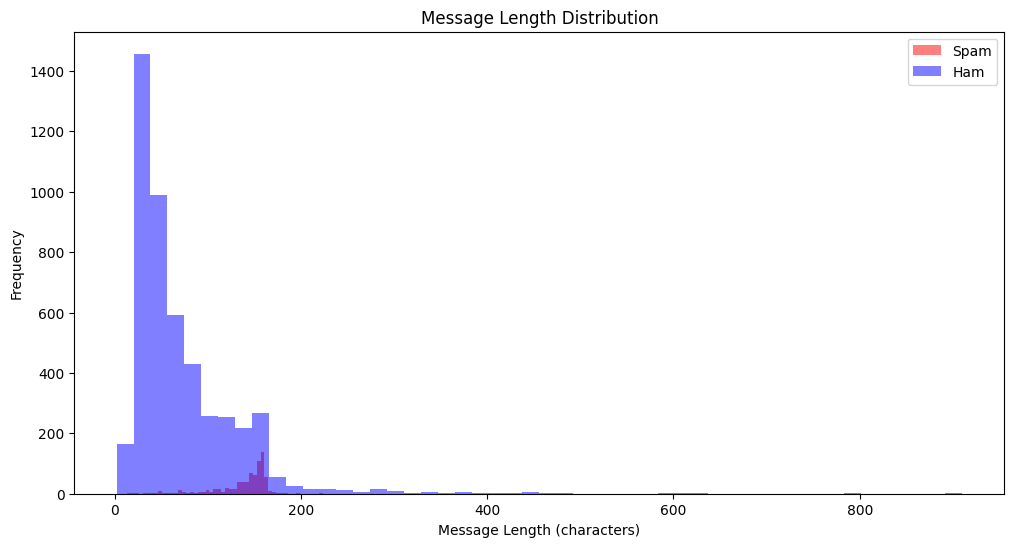

In [5]:
# Calculate average message length for spam and ham messages
spam_messages = df[df['label'] == 1]
ham_messages = df[df['label'] == -1]

spam_lengths = spam_messages['message'].apply(len)
ham_lengths = ham_messages['message'].apply(len)

avg_spam_length = spam_lengths.mean()
avg_ham_length = ham_lengths.mean()

print(f'Average message length for spam messages: {avg_spam_length:.2f} characters')
print(f'Average message length for ham messages: {avg_ham_length:.2f} characters')

# Plot the distribution of message lengths for spam and ham messages
plt.figure(figsize=(12, 6))

# Histogram for spam messages
plt.hist(spam_lengths, bins=50, alpha=0.5, label='Spam', color='red')
# Histogram for ham messages
plt.hist(ham_lengths, bins=50, alpha=0.5, label='Ham', color='blue')

plt.title('Message Length Distribution')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### Most Common Words

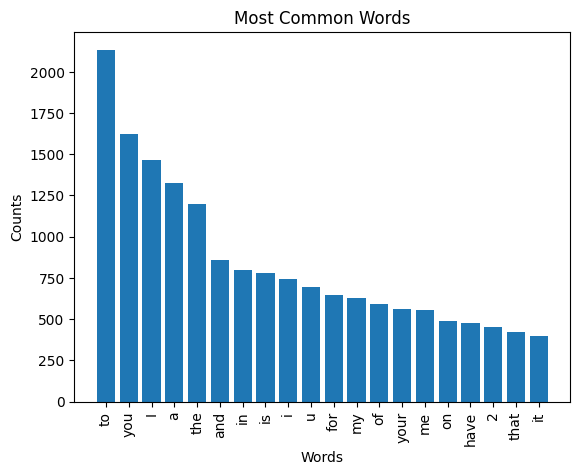

In [6]:
from collections import Counter

words = ' '.join(df['message']).split()
word_counts = Counter(words)
common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()


### Word Frequency Analysis by Class

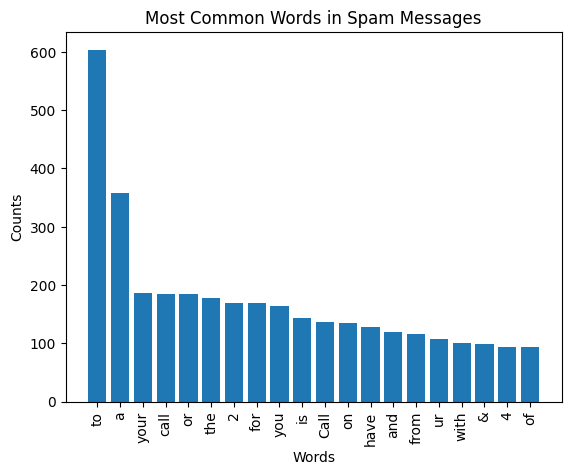

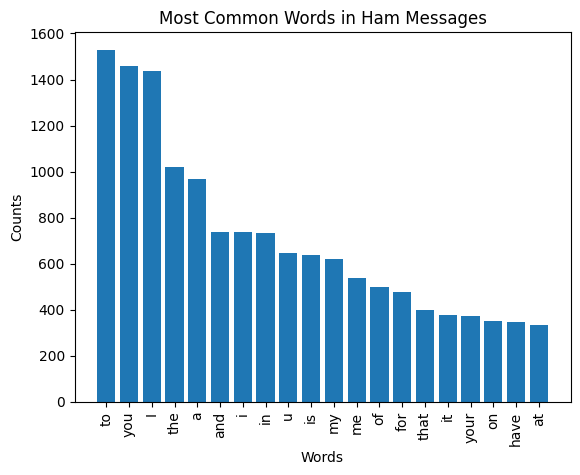

In [7]:
# Separate spam and ham messages
spam_messages = df[df['label'] == 1]['message']
ham_messages = df[df['label'] == -1]['message']

# Most common words in spam messages
spam_words = ' '.join(spam_messages).split()
spam_word_counts = Counter(spam_words)
common_spam_words = spam_word_counts.most_common(20)

# Plot the most common words in spam messages
words, counts = zip(*common_spam_words)
plt.bar(words, counts)
plt.title('Most Common Words in Spam Messages')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

# Most common words in ham messages
ham_words = ' '.join(ham_messages).split()
ham_word_counts = Counter(ham_words)
common_ham_words = ham_word_counts.most_common(20)

# Plot the most common words in ham messages
words, counts = zip(*common_ham_words)
plt.bar(words, counts)
plt.title('Most Common Words in Ham Messages')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

### N-grams Analysis

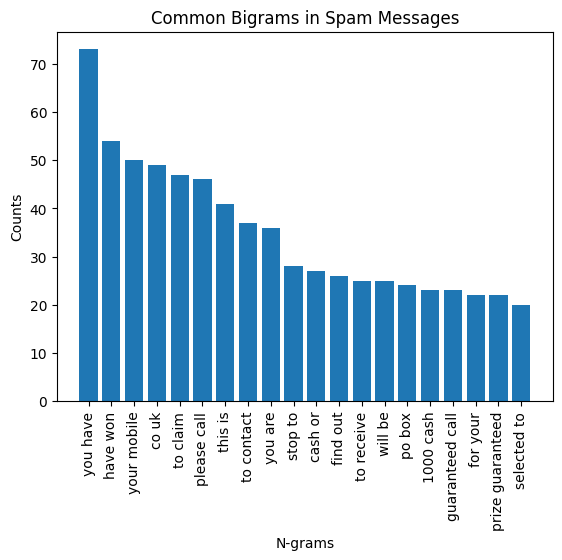

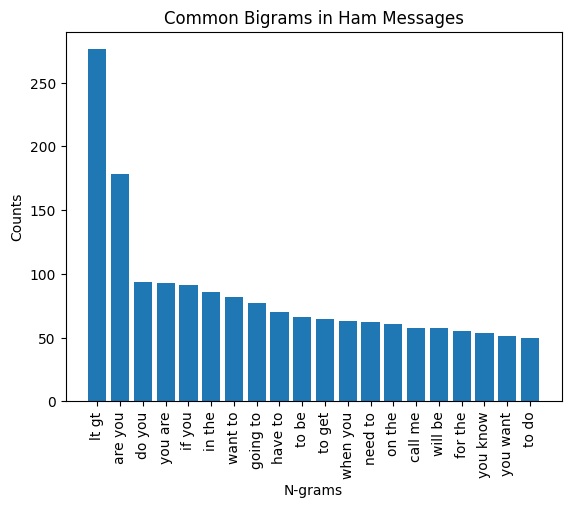

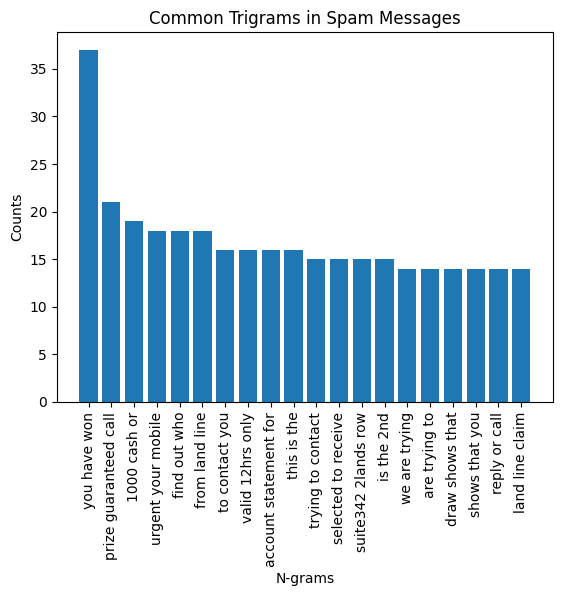

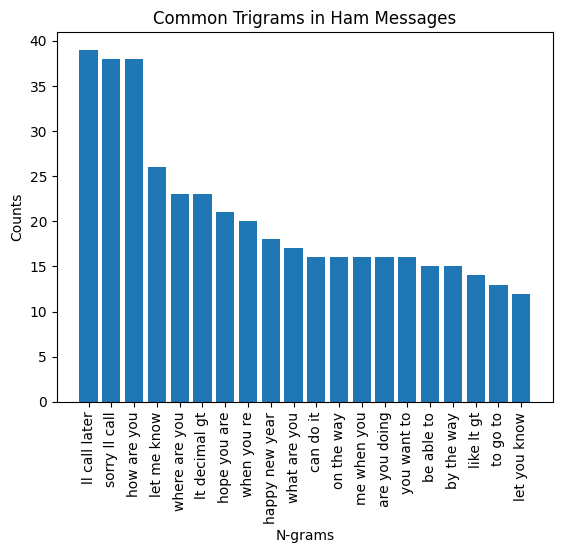

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot n-grams
def plot_ngrams(messages, n=2, title='Bigrams'):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(messages)
    ngrams_sum = ngrams.sum(axis=0) # type: ignore
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:20]

    words, counts = zip(*ngrams_freq)
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel('N-grams')
    plt.ylabel('Counts')
    plt.show()

# Plot bigrams in spam messages
plot_ngrams(spam_messages, n=2, title='Common Bigrams in Spam Messages')

# Plot bigrams in ham messages
plot_ngrams(ham_messages, n=2, title='Common Bigrams in Ham Messages')

# Plot trigrams in spam messages
plot_ngrams(spam_messages, n=3, title='Common Trigrams in Spam Messages')

# Plot trigrams in ham messages
plot_ngrams(ham_messages, n=3, title='Common Trigrams in Ham Messages')


## Exporting the Data

After cleaning the data, we export it to the `processed` folder for use in the preprocessing step next.

In [12]:
import os

# Define the directory paths
processed_data_dir = 'data/processed'

# Create directories if they don't exist
os.makedirs(processed_data_dir, exist_ok=True)

# Save the cleaned data to the processed folder
df.to_csv(os.path.join(processed_data_dir, 'eda_cleaned_spam.csv'), index=False)

## Summary and Insights

### Dataset Overview
- **Total messages:** 5,572
- **Spam messages:** 747 (13.4%)
- **Ham (non-spam) messages:** 4,825 (86.6%)

### Class Distribution
- The dataset is imbalanced, with a significantly higher number of ham messages compared to spam messages. This imbalance may need to be addressed during the preprocessing stage to ensure the model performs well on both classes.

### Message Length Distribution
- Most messages range between 50 to 100 words in length.
- Longer message have a peak around 175 words.
- Spam messages tend to be slightly longer on average compared to ham messages.

### Common Words
- **Spam Messages:**
  - Frequent words include action-oriented terms such as "call", "claim", "won", "mobile", "prize".
  - Numbers (e.g., "2", "4") and terms indicating urgency or importance (e.g., "guaranteed", "selected") are also common.
- **Ham Messages:**
  - Common words include general terms such as "you", "I", "to", "and".
  - Ham messages use more conversational language without specific patterns of urgency or prizes.

### Common Bigrams and Trigrams
- **Spam Messages:**
  - Prominent n-grams include phrases indicating prizes and actions, such as "you have won", "prize guranteed call", "valid 12hrs only", "urgent your mobile".
  - These n-grams suggest a pattern of spam messages frequently offering prizes and urging recipients to take immediate action.
- **Ham Messages:**
  - Frequent n-grams include common conversational phrases like "I'll call later", "how are you", "let me know".
  - These bigrams are less specific and more varied, reflecting general communication rather than targeted actions.

### Key Insights
- **Spam Indicators:** Words and n-grams related to prizes, urgent actions, and specific calls to action are prevalent in spam messages. These patterns can be leveraged for feature engineering to improve spam detection.
- **Conversational Nature of Ham Messages:** Ham messages consist of more generic and conversational language, with less repetitive patterns compared to spam messages.
- **Length as a Feature:** Message length could be a useful feature for classification, as spam messages tend to be longer and contain more specific instructions and information.

### Next Steps
- **Address Class Imbalance:** Techniques such as resampling (oversampling the minority class or undersampling the majority class) or using algorithms that handle class imbalance.
- **Modeling:** Develop and evaluate machine learning models using the engineered features, starting with simple models and progressing to more complex ones if needed.
